# 1. Load and Explore the IMDB dataset

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
from IPython.display import SVG
from tensorflow.keras.utils import model_to_dot

# Load the IMDB dataset
num_words = 10000
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=num_words)

# Print basic statistics
print(f"Number of training samples: {len(train_data)}")
print(f"Number of test samples: {len(test_data)}")
print(f"Length of first training sample: {len(train_data[0])}")
print(f"Length of second training sample: {len(train_data[1])}")

# Pad sequences so they have the same length
max_length = 250
train_data = pad_sequences(train_data, maxlen=max_length)
test_data = pad_sequences(test_data, maxlen=max_length)


Number of training samples: 25000
Number of test samples: 25000
Length of first training sample: 218
Length of second training sample: 189


In [2]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


# 2. Extract a sample Review from the dataset

In [3]:
def decode_review(text):
    # Get the word index from the dataset
    word_index = imdb.get_word_index()
    # Reverse the word index
    reversed_word_index = dict([(value, key) for (key, value) in word_index.items()])
    # Decode the review
    decoded_review = ' '.join([reversed_word_index.get(i - 3, '?') for i in text])
    return decoded_review

print("Sample 0:\n",decode_review(train_data[0]))
print("Expected sentiment: ", train_labels[0])

print("1 is positive, 0 is negative")

Sample 0:
 ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these child

# 3. Creation of the networks

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM
from tensorflow.keras.optimizers import Adam

def build_model(nb_units, learning_rate=0.005):
    model = Sequential()
    model.add(Dense(units=nb_units, activation='relu', input_shape=(max_length,)))
    model.add(Dense(units=nb_units, activation='relu'))
    model.add(Dense(units=1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', 
                optimizer='rmsprop', 
                metrics=['accuracy'])
    return model

def train_and_plot(model_name, model, train_data,train_labels, epochs, test_data, test_labels):
    history = model.fit(train_data, train_labels, epochs=epochs, validation_data=(test_data, test_labels))

    plt.title(f'Model {model_name} : Training and Validation Loss')
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.legend()
    plt.show()

## Create the different network sizes



Epoch 1/10
782/782 [==============================] - 2s 2ms/step - loss: 34.2927 - accuracy: 0.5020 - val_loss: 0.7914 - val_accuracy: 0.4996
Epoch 2/10
782/782 [==============================] - 1s 2ms/step - loss: 0.7299 - accuracy: 0.5034 - val_loss: 0.7132 - val_accuracy: 0.5000
Epoch 3/10
782/782 [==============================] - 1s 2ms/step - loss: 0.7056 - accuracy: 0.4968 - val_loss: 0.7121 - val_accuracy: 0.4996
Epoch 4/10
782/782 [==============================] - 1s 2ms/step - loss: 0.7010 - accuracy: 0.5025 - val_loss: 0.7194 - val_accuracy: 0.4995
Epoch 5/10
782/782 [==============================] - 1s 2ms/step - loss: 0.7041 - accuracy: 0.4994 - val_loss: 0.7136 - val_accuracy: 0.5005
Epoch 6/10
782/782 [==============================] - 1s 2ms/step - loss: 0.6990 - accuracy: 0.5029 - val_loss: 0.7061 - val_accuracy: 0.5000
Epoch 7/10
782/782 [==============================] - 1s 2ms/step - loss: 0.6977 - accuracy: 0.5002 - val_loss: 0.7122 - val_accuracy: 0.5002
Epoch

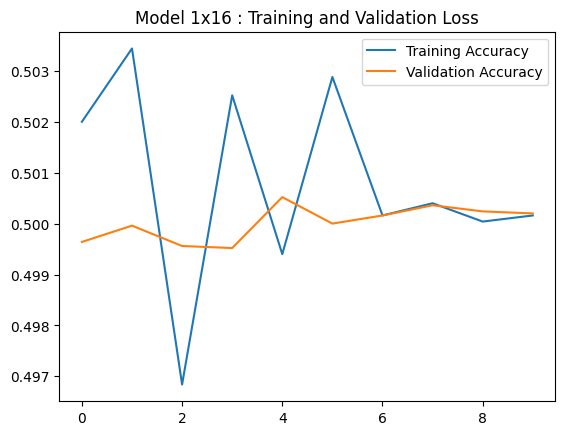

In [10]:
model = build_model(16)
train_and_plot("1x16", model, train_data, train_labels, 10, test_data, test_labels)

# 4. Introduce Overfitting

Typically, a model will overfit if:

- It has too many parameters (i.e., a large model).
- It's trained for too many epochs.
- There isn't enough training data.
- 
Here's how you can train the larger model for more epochs to induce overfitting:

Here we can see the effect of overfitting. The yellow show the validation accuracy and the blue shows the training accuracy. The validation accuracy decreases while the training accuracy increases. This is a clear sign of overfitting.

For preventing overfitting, there are many techniques including:

- Regularization
- Dropout
- Early stopping
- Using more training data or augmenting existing data
- Using simpler model architectures.

Remember, it's important to always validate the model on unseen data to understand how it's likely to perform in a real-world scenario.